In [2]:
!pip install spleeter#-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spleeter-2.3.1-py3-none-any.whl (51 kB)
     |████████████████████████████████| 77 kB 3.0 MB/s 
  Using cached norbert-0.2.1-py2.py3-none-any.whl (11 kB)
     |████████████████████████████████| 14.8 MB 11.7 MB/s 
     |████████████████████████████████| 183 kB 14.8 MB/s 
  Using cached importlib_metadata-3.10.1-py3-none-any.whl (14 kB)
     |████████████████████████████████| 25.3 MB 1.6 MB/s 
     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 132 kB 65.1 MB/s 
     |████████████████████████████████| 1.2 MB 45.3 MB/s 
     |████████████████████████████████| 462 kB 8.6 MB/s 
     |████████████████████████████████| 4.0 MB 42.0 MB/s 
     |████████████████████████████████| 58 kB 6.1 MB/s 
     |████████████████████████████████| 57 kB 5.7 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████

In [1]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import librosa
import sklearn
import cv2
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import os
import pandas as pd
import glob 
from os import path
import os
from pydub import AudioSegment, silence
from pydub.utils import make_chunks
from pydub.silence import split_on_silence
from math import *
import sys

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


/content/test
/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)
INFO:spleeter:File output/audio_example/accompaniment.wav written succesfully
INFO:spleeter:File output/audio_example/vocals.wav written succesfully
exporting /content/test/out_audio.wav
exporting /content/test2/output_audio.wav


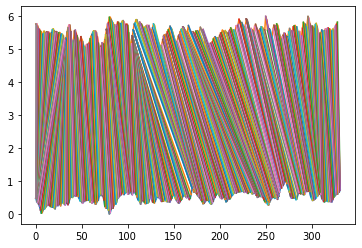

Total Distance is  32.27021676581353


([<matplotlib.lines.Line2D at 0x7ff6019e8a50>], (0.2, 0.8))

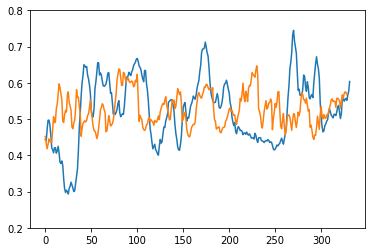

In [79]:
%cd /content/test

CFG = {
    'SR':44000,
    'N_MFCC':13,
    'SEED':41
}

sample_rate=CFG["SR"]
n_mfcc = CFG['N_MFCC']

input_audio = 'audio_example'
filepath1='/content/test/'
filelist1=os.listdir(filepath1)

for name in filelist1:
    if name.split(".")[0] == 'sample_audio':
        newname=name.split(".")[0]
        audioSegment = AudioSegment.from_file(filepath1+name)
        audioSegment.export(filepath1+input_audio+'.wav', format='wav')
    else:
        pass

!spleeter separate -p spleeter:2stems -o output audio_example.wav
#!spleeter separate -i audio_example.wav -p spleeter:2stems -o output
audio_test = filepath1 + 'output/' + input_audio + '/vocals.wav'

def detect_leading_silence(sound, silence_threshold=-40.0, chunk_size=10):
    trim_ms = 0

    assert chunk_size > 0
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms

sound = AudioSegment.from_file(audio_test, format="wav")

start_trim = detect_leading_silence(sound)
end_trim = detect_leading_silence(sound.reverse())

duration = len(sound)    
trimmed_sound = sound[start_trim:duration-end_trim]

def match_target_amplitude(aChunk, target_dBFS):
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

dBFS= trimmed_sound.dBFS

chunks = split_on_silence (
    trimmed_sound, 
    min_silence_len = 1000,
    silence_thresh = dBFS-32
)

for i, chunk in enumerate(chunks):
    out_file1 = filepath1+ 'out_audio.wav'
    print("exporting", out_file1)
    chunk.export(out_file1, format="wav")

filepath2='/content/test2/'
filelist2=os.listdir(filepath2)

for name in filelist2:
    if name.split(".")[0] == 'test_audio':
        newname=name.split(".")[0]
        audioSegment = AudioSegment.from_file(filepath2+name)
        audioSegment.export(filepath2+newname+'.wav', format='wav')
    else:
        pass

def detect_leading_silence(sound, silence_threshold=-40.0, chunk_size=10):
    trim_ms = 0

    assert chunk_size > 0
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms

sound = AudioSegment.from_file(filepath2+newname+'.wav', format="wav")

start_trim = detect_leading_silence(sound)
end_trim = detect_leading_silence(sound.reverse())

duration = len(sound)    
trimmed_sound = sound[start_trim:duration-end_trim]

def match_target_amplitude(aChunk, target_dBFS):
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

dBFS= trimmed_sound.dBFS

chunks = split_on_silence (
    trimmed_sound, 
    min_silence_len = 1000,
    silence_thresh = dBFS-16
)

for i, chunk in enumerate(chunks):
    out_file2 = filepath2+ 'output_audio.wav'
    print("exporting", out_file2)
    chunk.export(out_file2, format="wav")

y1, sr1 = librosa.load(out_file1, sample_rate)

for audio in filelist1:
    if audio == 'out_audio.wav':
        mfcc_out = librosa.feature.mfcc(y=y1, sr=16000, n_mfcc=n_mfcc)
        mfcc_out = sklearn.preprocessing.minmax_scale(mfcc_out, axis=1)
    else:
        pass

y2, sr2 = librosa.load(out_file2, sample_rate)

for audio in filelist2:
    if audio == 'output_audio.wav':
        mfcc_output = librosa.feature.mfcc(y=y2, sr=16000, n_mfcc=n_mfcc)
        mfcc_output = sklearn.preprocessing.minmax_scale(mfcc_output, axis=1)
    else:
        pass

def DTW(A, B, window = sys.maxsize, d = lambda x,y: abs(x-y)):
    A, B = np.array(A), np.array(B)
    M, N = A.size, B.size
    cost = sys.maxsize * np.ones((M, N))

    cost[0, 0] = d(A[0], B[0])
    for i in range(1, M):
        cost[i, 0] = cost[i-1, 0] + d(A[i], B[0])

    for j in range(1, N):
        cost[0, j] = cost[0, j-1] + d(A[0], B[j])

    for i in range(1, M):
        for j in range(max(1, i - window), min(N, i + window)):
            choices = cost[i - 1, j - 1], cost[i, j-1], cost[i-1, j]
            cost[i, j] = min(choices) + d(A[i], B[j])

    n, m = N - 1, M - 1
    path = []

    while (m, n) != (0, 0):
        path.append((m, n))
        m, n = min((m - 1, n), (m, n - 1), (m - 1, n - 1), key = lambda x: cost[x[0], x[1]])
    
    path.append((0,0))
    return cost[-1, -1], path

def main():
    global max_cost
    global mean
    total = 0
    arr = np.array([])
    for i in range(len(mfcc_out)):
        A, B = mfcc_out[i], mfcc_output[i]
        cost, path = DTW(A, B, window = 999999)
        arr = np.append(arr, cost)
        #print('Total Distance is{0} '.format(i), cost)
        total += cost
    max_cost = np.where(arr == max(arr))[0][0]
    #print(max_cost)
    mean = total/len(mfcc_out)
    import matplotlib.pyplot as plt
    offset = 5
    plt.plot(A)
    plt.plot(B + offset)
    for (x1, x2) in path:
        plt.plot([x1, x2], [A[x1], B[x2] + offset])
    plt.show()
    print('Total Distance is ', mean)
if __name__ == '__main__':
    main()

plt.plot(mfcc_out.mean(axis=0)), plt.ylim([0, 1])
plt.plot(mfcc_output.mean(axis=0)), plt.ylim([0, 1])

In [88]:
dtw_score = []
length_score = []

if mean <= 20:
    dtw_score.append(5)
elif 20 < mean < 40:
    dtw_score.append(4)
elif 40 < mean <= 60:
    dtw_score.append(3)
elif 60 < mean <= 100:
    dtw_score.append(2)
else:
    dtw_score.append(1)

if 0.9 <= len(y2)/len(y1) <= 1.0:
    length_score.append(5)
elif 0.8 <= len(y2)/len(y1) < 0.9:
    length_score.append(4)
elif 0.7 <= len(y2)/len(y1) < 0.8:
    length_score.append(3)
elif 0.5 <= len(y2)/len(y1) < 0.7:
    length_score.append(2)
elif len(y2)/len(y1) < 0.5:
    length_score.append(1)
else:
    length_score.append(1)

C = dtw_score[0]
D = length_score[0]
final_score = (C+D) / 2
print(final_score)

4.5
